# Examples

## Attention

We look at some examples to compute attention using pytorch.

In [1]:
import torch 
import torch.nn
import numpy as np
from torchinfo import summary

We can construct random vectors like this, in general we will only be interested in the size of the output. Here the vector v simulates a sequence of 10 values with an embedding size of 4.

In [2]:
v = torch.rand([10,4])
print(v)
print(v.shape)

tensor([[0.5438, 0.4920, 0.5062, 0.7719],
        [0.8921, 0.1793, 0.9897, 0.2171],
        [0.6704, 0.1244, 0.3875, 0.5464],
        [0.0434, 0.7020, 0.6974, 0.7235],
        [0.2376, 0.3597, 0.4516, 0.1959],
        [0.4017, 0.7895, 0.7583, 0.5332],
        [0.3559, 0.5919, 0.8637, 0.9000],
        [0.7589, 0.1631, 0.3337, 0.5555],
        [0.2028, 0.5569, 0.7140, 0.9758],
        [0.9424, 0.7700, 0.3442, 0.8315]])
torch.Size([10, 4])


### Calculating attention values

torch has a function `scaled_dot_product_attention` to calculate the attention efficiently.

Lets first look at self-attention, what is the result?

In [3]:
from torch.nn.functional import scaled_dot_product_attention

attention = scaled_dot_product_attention(query=v, value=v, key=v, dropout_p=0.0)

In [4]:
print(attention)
print(attention.shape)

tensor([[0.5106, 0.4950, 0.6128, 0.6522],
        [0.5310, 0.4730, 0.6230, 0.6241],
        [0.5236, 0.4786, 0.6080, 0.6381],
        [0.4851, 0.5067, 0.6231, 0.6584],
        [0.5048, 0.4853, 0.6149, 0.6348],
        [0.5006, 0.5020, 0.6216, 0.6505],
        [0.4965, 0.5032, 0.6233, 0.6589],
        [0.5273, 0.4787, 0.6059, 0.6384],
        [0.4912, 0.5048, 0.6212, 0.6623],
        [0.5259, 0.4990, 0.6053, 0.6555]])
torch.Size([10, 4])


The 10x4 result is actually the attention performed for all the queries.

### Attention with single query
We can also just calculate the result of a single query. So let's use different variables for the query and the key, but keep the values. We need as many keys as we have values. As indicated in the picture below, the result is then a weighted sum of the values

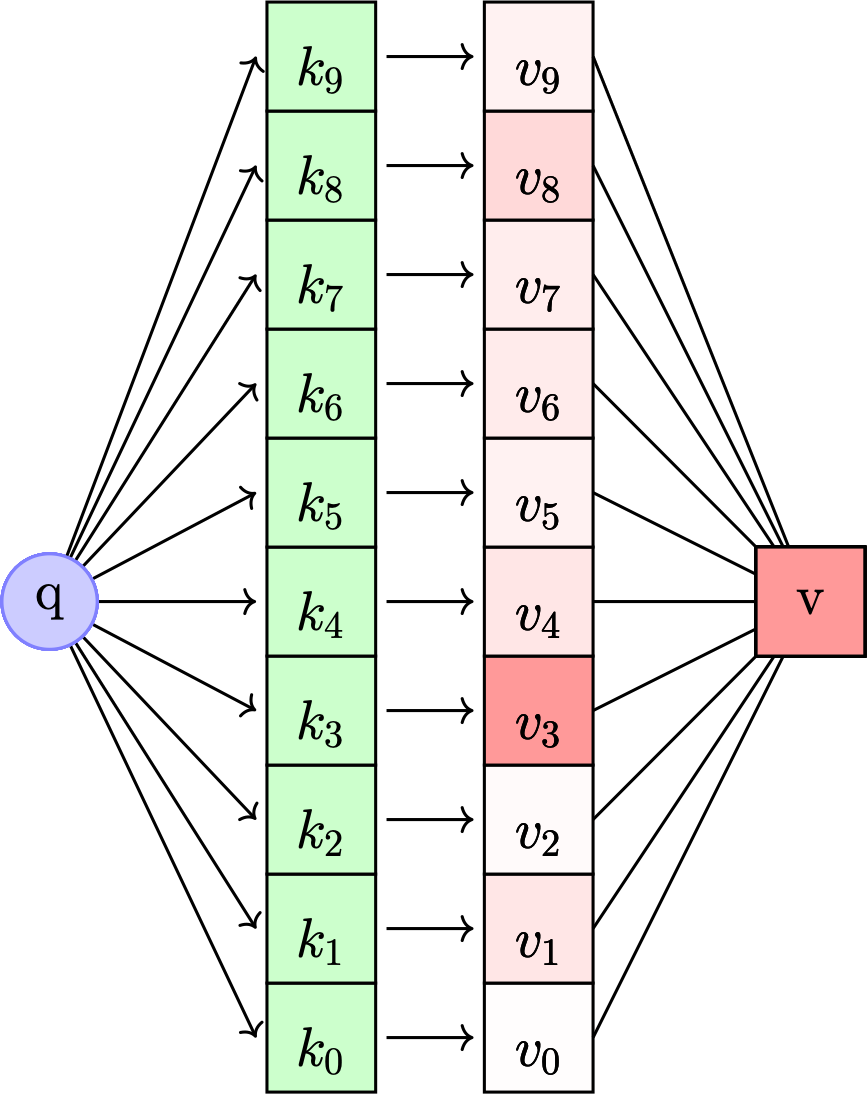


In [5]:
q = torch.rand([1,4])
k = torch.rand([10,4])

attention = scaled_dot_product_attention(query=q, key=k, value=v)
print(attention)
print(attention.shape)

tensor([[0.5030, 0.4706, 0.6098, 0.6239]])
torch.Size([1, 4])


### Attention with different sizes for query and key

The query and key are used to calculate the attention weight, they do not need to be the same dimensions as the values. This is in fact used in the MultiHeadedAttention where the keys and queries are projected to smaller dimension.

In [6]:
q = torch.rand([1,2])
k = torch.rand([10,2])

attention = scaled_dot_product_attention(query=q, key=k, value=v)
print(attention)
print(attention.shape)

tensor([[0.5192, 0.4485, 0.6177, 0.6023]])
torch.Size([1, 4])


### Number of parameters

How many trainable variables are there in the attention calculation ?




The attention operation itself has zero parameters. We are going to use a linear transformation to scale q, k and v - and this transformation has parameters which can be learned.

## Multiheaded attention

Let us now look at the multiheaded attention class in pytorch that can be used to build the transformer architecture.

We will first look at a single head. If we dont specify the embedding dimensions for the key and value, they will be the same as for the query.

In [7]:
from torch.nn import MultiheadAttention
mha = MultiheadAttention(embed_dim=4, num_heads=1, kdim=None, vdim=None, batch_first=True)

In [8]:
# unbatched example with only one query
q = torch.rand([1,4])
k = torch.rand([10,4])
v = torch.rand([10,4])
with torch.no_grad():
    result, weights = mha.forward(query=q, key=k, value=v)
print(result)
print(result.shape)
print(weights)
print(weights.shape)

tensor([[-0.4038, -0.4453, -0.0235,  0.1766]])
torch.Size([1, 4])
tensor([[0.0989, 0.0989, 0.1018, 0.0981, 0.0997, 0.0965, 0.1054, 0.0980, 0.0990,
         0.1038]])
torch.Size([1, 10])


## Multiheaded self attention

To calculate the self attention, we just set the query, key and value to the same vector.

In [9]:
# unbatched self attention_and_transformers
v = torch.rand([10,4])
with torch.no_grad():
    result, weights = mha.forward(query=v, key=v, value=v)
print(result)
print(result.shape)
print(weights)
print(weights.shape)

tensor([[-0.0467, -0.2250, -0.2378, -0.0299],
        [-0.0457, -0.2247, -0.2375, -0.0308],
        [-0.0496, -0.2251, -0.2377, -0.0266],
        [-0.0461, -0.2245, -0.2373, -0.0303],
        [-0.0485, -0.2256, -0.2381, -0.0280],
        [-0.0462, -0.2247, -0.2376, -0.0303],
        [-0.0483, -0.2256, -0.2380, -0.0282],
        [-0.0498, -0.2261, -0.2383, -0.0267],
        [-0.0480, -0.2252, -0.2379, -0.0285],
        [-0.0501, -0.2263, -0.2386, -0.0264]])
torch.Size([10, 4])
tensor([[0.0982, 0.1081, 0.1061, 0.1127, 0.0916, 0.1038, 0.1036, 0.0943, 0.0986,
         0.0830],
        [0.0973, 0.1090, 0.1098, 0.1160, 0.0891, 0.1044, 0.1040, 0.0931, 0.0982,
         0.0790],
        [0.0989, 0.1029, 0.1030, 0.1048, 0.0967, 0.1011, 0.1018, 0.0981, 0.0995,
         0.0931],
        [0.0967, 0.1080, 0.1094, 0.1143, 0.0903, 0.1032, 0.1044, 0.0943, 0.0984,
         0.0810],
        [0.1007, 0.1058, 0.1034, 0.1087, 0.0940, 0.1043, 0.1008, 0.0951, 0.0993,
         0.0880],
        [0.0972, 0.1084,

### Multiple heads

What happens to the result if we use multiple heads?

- The query and key values will get projected to lower dimension vectors of size (embedding / nr_heads) for each of the heads with a different project matrix.
- The output of a single head still has the dimension of the value embedding
- So if we concatenate the outputs of all heads the result will have a dimension of embedding * heads.
- The concatenated vector is therefor multiplied by another weight matrix to bring it back to the length of the value embedding.

The result sizes of multiheaded attention is therefor independent of the number of heads.

In [9]:
# same with more heads, each head will project the q and k to a lower dimension, usually d/h
# so the embedding dimension must be devisable by num_heads
v = torch.rand([10,4])
mha = MultiheadAttention(embed_dim=4, num_heads=2, kdim=None, vdim=None, batch_first=True)
with torch.no_grad():
    result, weights = mha.forward(query=v, key=v, value=v)
print(result)
print(result.shape)
print(weights)
print(weights.shape)


tensor([[-0.0446,  0.0545,  0.0548,  0.0045],
        [-0.0451,  0.0517,  0.0481,  0.0049],
        [-0.0430,  0.0562,  0.0587,  0.0028],
        [-0.0462,  0.0514,  0.0478,  0.0061],
        [-0.0450,  0.0541,  0.0538,  0.0050],
        [-0.0447,  0.0544,  0.0545,  0.0049],
        [-0.0459,  0.0511,  0.0468,  0.0057],
        [-0.0445,  0.0528,  0.0503,  0.0045],
        [-0.0452,  0.0524,  0.0502,  0.0048],
        [-0.0447,  0.0533,  0.0517,  0.0048]])
torch.Size([10, 4])
tensor([[0.1003, 0.0980, 0.0934, 0.1033, 0.1006, 0.1008, 0.1046, 0.0993, 0.0980,
         0.1018],
        [0.0949, 0.1058, 0.0942, 0.1005, 0.0938, 0.0941, 0.1076, 0.1069, 0.0993,
         0.1031],
        [0.0986, 0.0982, 0.0857, 0.1054, 0.0997, 0.1010, 0.1091, 0.1031, 0.0930,
         0.1062],
        [0.0981, 0.1025, 0.0998, 0.0999, 0.0972, 0.0967, 0.1026, 0.1015, 0.1019,
         0.0996],
        [0.1007, 0.0979, 0.0952, 0.1029, 0.1008, 0.1006, 0.1037, 0.0984, 0.0993,
         0.1006],
        [0.1008, 0.0975,

## Trainable Parameters

How many trainable parameters does the multihead attention have, and what are they for?

In [10]:
class OnlyAttention(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.attention = MultiheadAttention(embed_dim=2, num_heads=1, kdim=2, vdim=4, batch_first=True)
    def forward(self, q, v, k):
        return self.attention.forward(query=q, key=k, value=v)

In [11]:
mha = OnlyAttention()
summary(mha)
print(mha)

for name, param in mha.named_parameters():
    print(name)
    print(param)


OnlyAttention(
  (attention): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=2, out_features=2, bias=True)
  )
)
attention.q_proj_weight
Parameter containing:
tensor([[-0.9590, -0.5985],
        [-1.0788,  0.9830]], requires_grad=True)
attention.k_proj_weight
Parameter containing:
tensor([[ 0.7274,  0.6879],
        [-0.2112, -1.0682]], requires_grad=True)
attention.v_proj_weight
Parameter containing:
tensor([[-0.4838, -0.8043, -0.9592, -0.8510],
        [ 0.4784,  0.6115, -0.4377,  0.4999]], requires_grad=True)
attention.in_proj_bias
Parameter containing:
tensor([0., 0., 0., 0., 0., 0.], requires_grad=True)
attention.out_proj.weight
Parameter containing:
tensor([[ 0.0376,  0.3260],
        [ 0.0134, -0.2884]], requires_grad=True)
attention.out_proj.bias
Parameter containing:
tensor([0., 0.], requires_grad=True)


## Transformer Encoder

Finally torch allows to build a transformer or the encoder and decoder seperately. For classification, as needed in the exercises, we only need a encoder.

In [12]:
from torch.nn import TransformerEncoder, TransformerEncoderLayer

layer = TransformerEncoderLayer(d_model=4, nhead=1, dim_feedforward=16, dropout=0.1, batch_first=True)
encoder = TransformerEncoder(layer, num_layers=4)

v = torch.rand([10,4])
result_layer = layer.forward(v)
print(result_layer.shape)

result_encoder = encoder.forward(v)
print(result_encoder.shape)

torch.Size([10, 4])
torch.Size([10, 4])


/Users/marbetschar/miniconda3/envs/ZHAW-Advanced-Deep-Learning/lib/python3.13/site-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(


Parameters of the decoder

In [13]:
class TransformEnc(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = TransformerEncoderLayer(d_model=4, nhead=1, dim_feedforward=16, dropout=0.1, batch_first=True)
        self.encoder = TransformerEncoder(self.layer, num_layers=4)

    def forward(self, v):
        return encoder.forward(v)

In [14]:
enc = TransformEnc()
summary(enc)

Layer (type:depth-idx)                                            Param #
TransformEnc                                                      --
├─TransformerEncoderLayer: 1-1                                    --
│    └─MultiheadAttention: 2-1                                    60
│    │    └─NonDynamicallyQuantizableLinear: 3-1                  20
│    └─Linear: 2-2                                                80
│    └─Dropout: 2-3                                               --
│    └─Linear: 2-4                                                68
│    └─LayerNorm: 2-5                                             8
│    └─LayerNorm: 2-6                                             8
│    └─Dropout: 2-7                                               --
│    └─Dropout: 2-8                                               --
├─TransformerEncoder: 1-2                                         --
│    └─ModuleList: 2-9                                            --
│    │    └─TransformerEncoderL